### Modeling Logistic Regression

My first choice in models will be Logistic Regression. The reason I will use this model is because the model needs to make predictions on a discrete variable and in a binary output 1 = Space X and 0 = NASA.

In order to optimze the model I will be using GridSearch to ensure the hyperparameters are tuned to the best settings.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import csv

from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
np.random.seed(42)

### Gridsearch with Logistic Regression

GridSearchCV is the modeling technique that searches for the optimal hyperparameters provided during the instantiating of a model. Using its built in cross validation it can search over the grid of the provided hyperparameters to evaluate the performance of each and then use the parameters it found to be the best when making the predictions.

#### Logistic Regression

This is a modeling technique that will predict the probability of an event occuring given some previous data about the variable it's predicting. This is a modeling technique used to predict discreate variables and in this specific case we will be predicting a binary outcome of whether a post is from Space X (1) or NASA (0).

### Step # 1: Load the Data

With our TfidfVectorizer completed we now have a dataframe that holds the features we want to fit for modeling so I will import this as the features_df variable. Using the weights decided during the Tfidf our model can make the most optimal predictions and to analyze this later I will import the Tfidf performed previously.

In [2]:
features_df = pd.read_csv('../data/tvec_df.csv')
tvec = pd.read_pickle('../pickles/tvec.pkl')

In [3]:
features_df.head()

,11,12,15,2018,39a,40,air,air force,amp,apollo,...,time,today,twitter,vab,vehicle,video,view,year,years,subreddit
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,spacex
1,0.0,0.0,0.0,0.868537,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,spacex
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,spacex
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.387832,0.0,0.0,0.0,0.0,0.476247,0.0,spacex
4,0.0,0.0,0.0,0.000000,0.0,0.307456,0.0,0.0,0.0,0.0,...,0.304733,0.0,0.267847,0.0,0.0,0.0,0.0,0.000000,0.0,spacex


In [4]:
features_df['subreddit'].value_counts()

nasa      1227
spacex    1221
Name: subreddit, dtype: int64

### Step 2: Setup the X and y

With a final features dataframe for modeling I will setup the X and y variables to be used for training the model for making its final predictions. I will also convert the target variable (y) to a binary format where Space X = 1 and NASA = 0.

In [5]:
features_df['y'] = [1 if i == 'spacex' else 0 for i in features_df['subreddit']]

In [6]:
X = features_df.drop(['subreddit', 'y'], axis=1)
y = features_df['y']

### Step # 3: Train / Test / Split

To perform testing of our model we perform a train, test and split to split our data up into training data for modeling and testing data to verify the accuracy of our model.
- I will use the default split of 75% training data and 25% testing data
- Using stratify my target variable will be split into equal proportions of Space X and NASA during splitting so that the model can be trained on enough of the data from each class

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

### Step # 4: Instantiate Model and Setup Parameters

Setting up a variable assigned to the Logistic Regression model along with the parameters I'd like the GridSearch to search through for the best parameters to be used in the Logistic Regression model.

Using the cross val score to setup a baseline accuracy that I will aim to beat with my model.

#### Parameter Descriptions

The following parameters will be searched through during GridSearch and checked for which combination yields the highest accuracy model.
- Penalty : l1 (Lasso) or l2 (Ridge) 
    - The regulariztion penalties to apply to the provided features (words)
- C : The regularization strength 
    - Will provide one low, the default value and one high value
    - Lower C will result in more regularization
- Class Weight : None or Balanced
    - Penalizes mistakes in sample
    - If Balanced uses y to automatically adjust weights

In [8]:
log_reg = LogisticRegression()

In [9]:
cross_val_score(log_reg, X_train, y_train).mean() ## Accuracy to beat

0.8981452935437014

In [10]:
params = {
    'penalty': ['l1', 'l2'],
    'C': [.1, 1, 10],
    'class_weight': [None, 'balanced']
}

### Step # 5: Instantiate & Fit the GridSearch

Setting up a variable assigned to the GridSearch model and specifically asking that using Logistic Regression search through the identified parameters for the best parameters to be used in the model.

In [11]:
gs = GridSearchCV(log_reg, param_grid=params)

In [12]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Interpretation of GridSearch

After performing the GridSearch the best parameters of those that I passed in were:
- C = 1
    - This is saying that the regularization strength should be moderate
- Class Weight = None
    - This is stating that we don't need to balance y to automatically adjust weights for the mistakes in sample
- Penalty = l2 (Ridge)
    - The regularization penalty to apply to features
    - Specifically, sum of the the squares of all the feature weights
    
I can also review the rest of the parameters that were fit as being the most optimal to go along with those that we asked the GridSearch to look through above.

In [13]:
gs.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [14]:
gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Step # 6: Score the model 

#### Interpretation

The logistic regression model is explaining 91.5% of the variance within the model. The other main thing to note is that our testing accuracy is scoring a little lower than our training accuracy score which means the model is a little overfit. The difference between the training and testing score is extremely low which is good and means we are not overfit by very much.

In [15]:
gs.score(X_train, y_train)

0.9166666666666666

In [17]:
gs.score(X_test, y_test)

0.9150326797385621

#### Fetaure Coefficients

Lets see what the model found to be the most influencial features in this Logistic Regression model. To do this I will create a dataframe with the features and their corresponding coefficients.

In [21]:
df_columns = tvec.get_feature_names()
coef_df = pd.DataFrame(gs.best_estimator_.coef_.T, 
             index=df_columns, 
             columns=['coef_weight']).sort_values('coef_weight', ascending=False)

In [22]:
coef_df.head()

,coef_weight
spacex,5.848564
falcon,4.730940
bfr,2.803362
block,2.677667
dragon,2.562716


#### Interpretation

Because there are 111 features contributing to this model I am going to filter for the top 10 and bottom 10 to identify what was positively and negatively impacting the model with the most power. 

Top positive coefficients:
- spacex 
- falcon
- bfr
- block
- dragon
- iridium
- port
- crs
- thread
- musk

Top negative coefficients:
- nasa
- apollo
- sls
- saturn
- rover
- iss
- solar
- center
- shuttle
- view

The coefficients make sense in that the top postive coefficients are what are contributing to the model predicting Space X (1) and the top negative coefficients are what are contributing to the model predicting NASA (0).

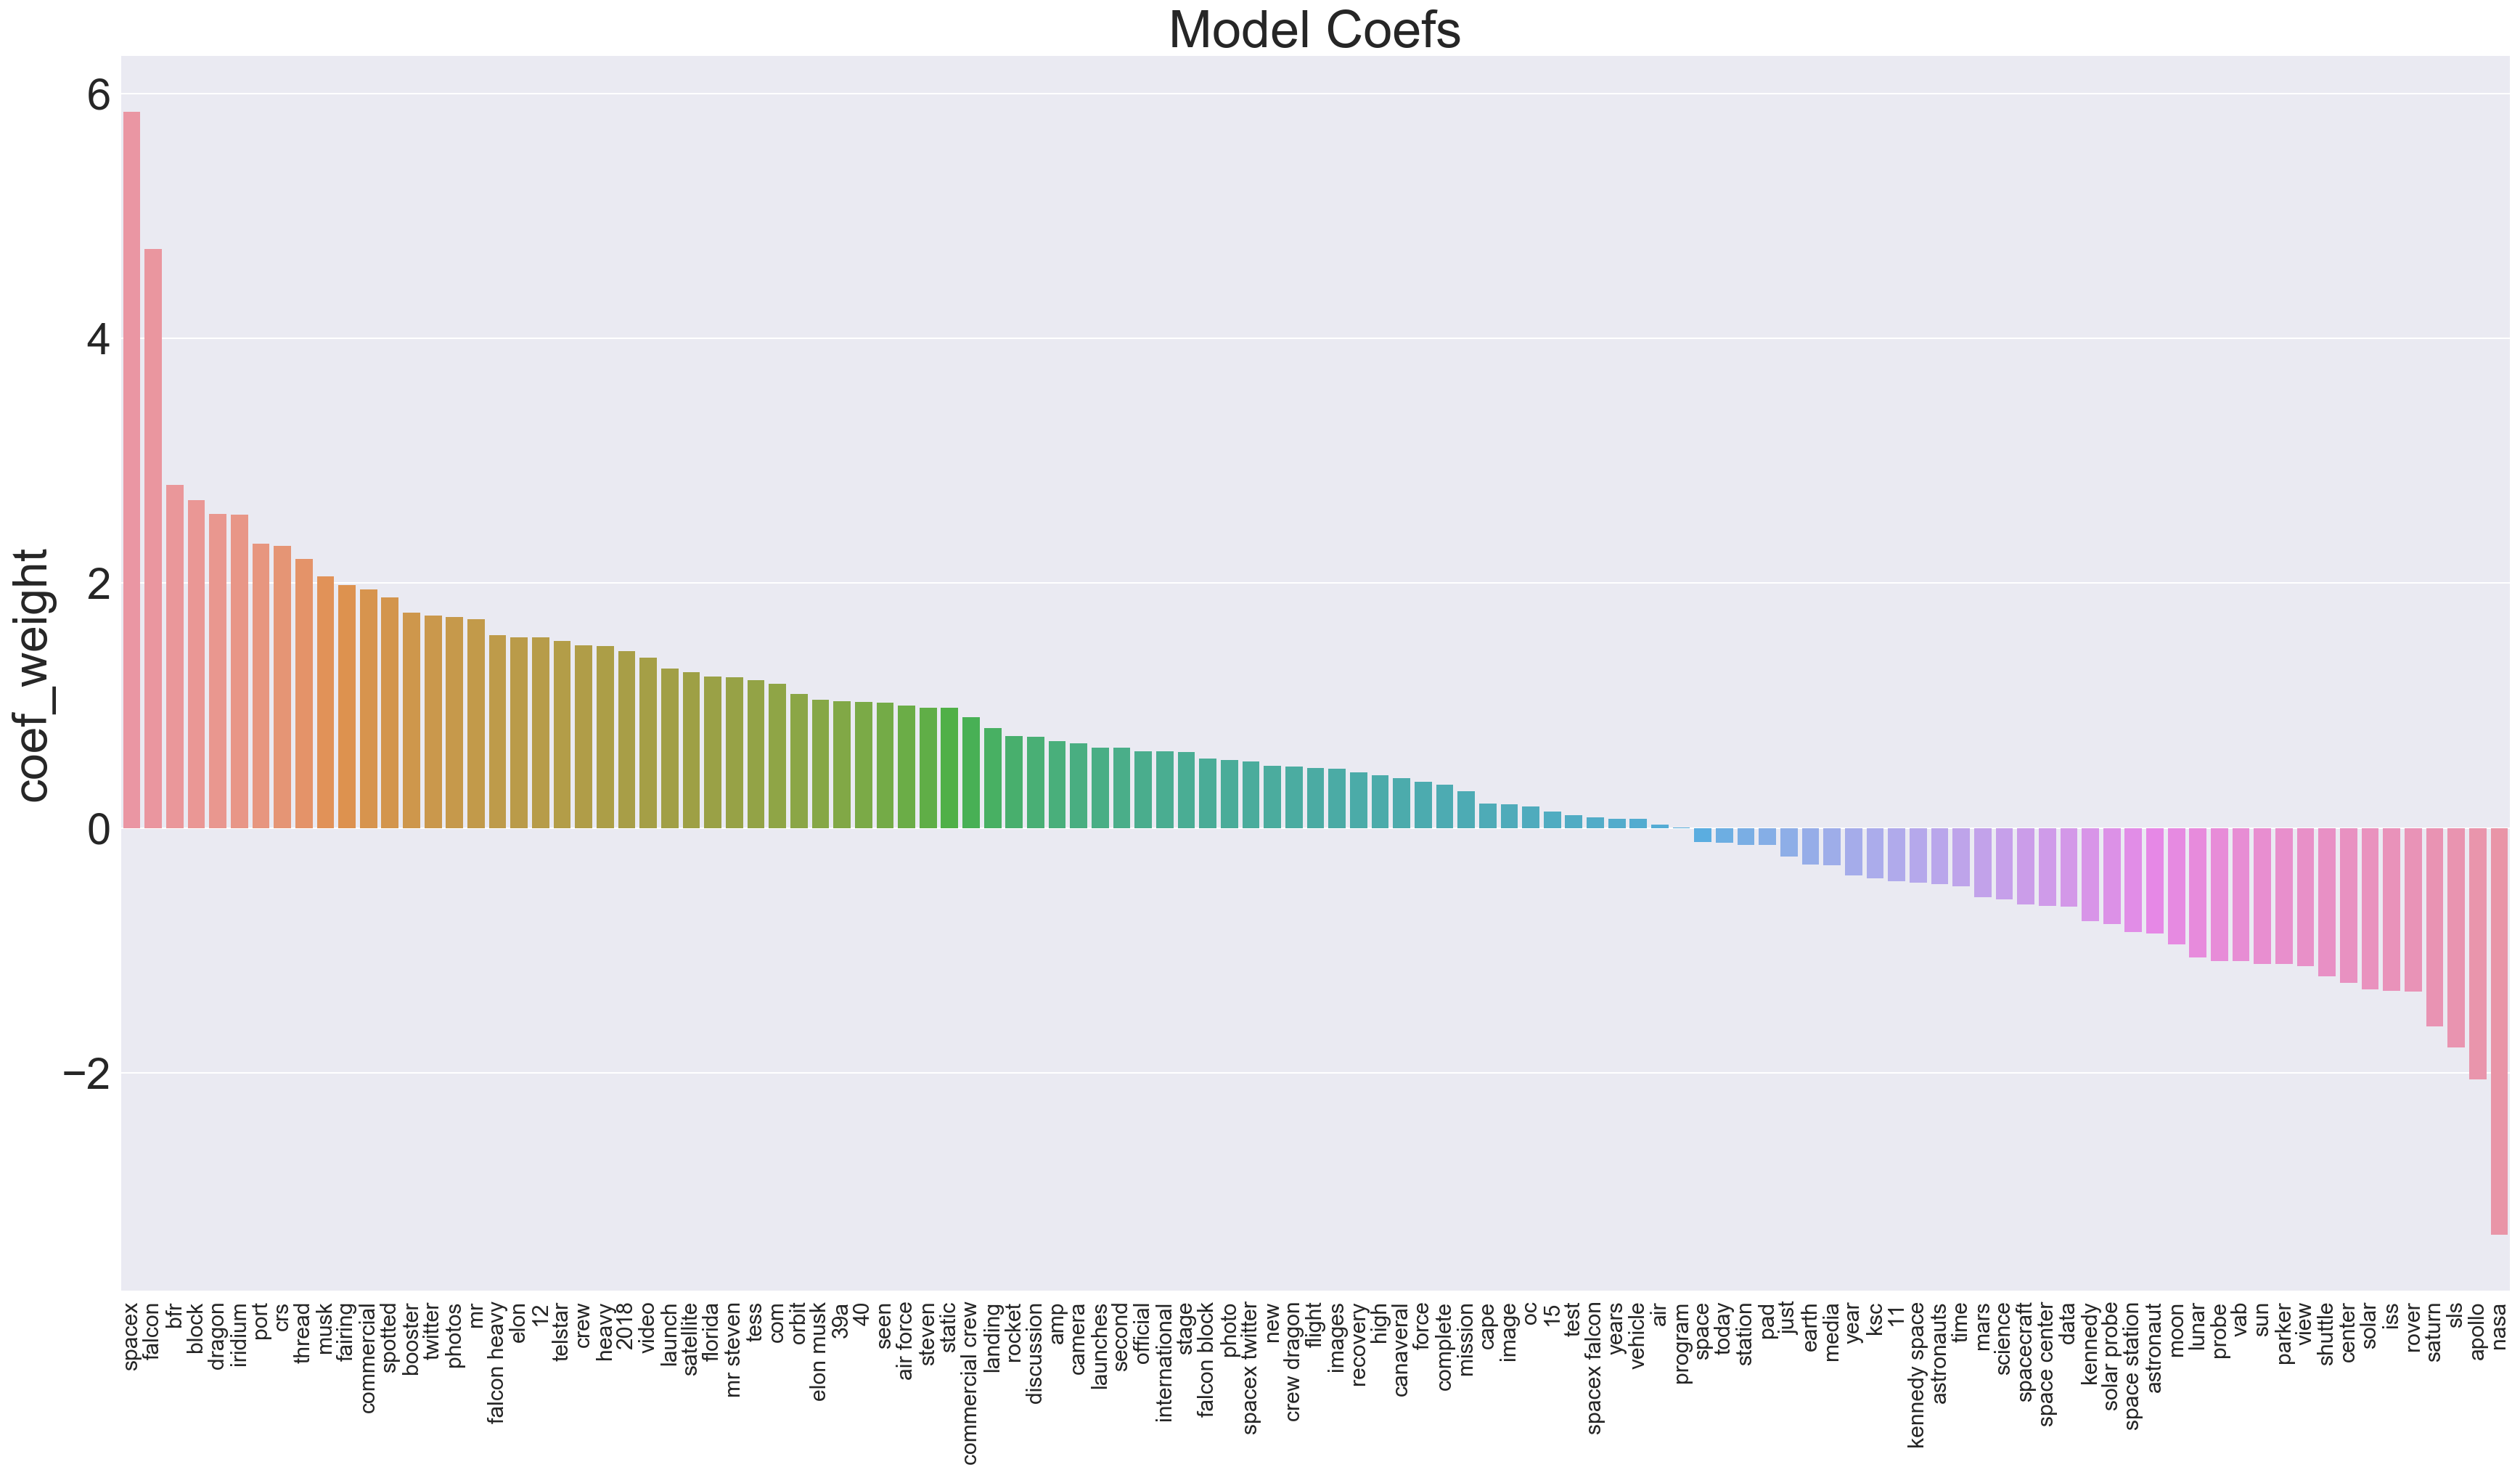

In [23]:
plt.figure(figsize=(25,15))
sns.set(font_scale=3)
plt.title('Model Coefs')
locs, labels = plt.xticks(fontsize=15)
plt.setp(labels, rotation=90)
sns.barplot(x=coef_df.index, y='coef_weight', data=coef_df, alpha=1)
plt.tight_layout();
#plt.savefig('../plots/model_coefs_bar')

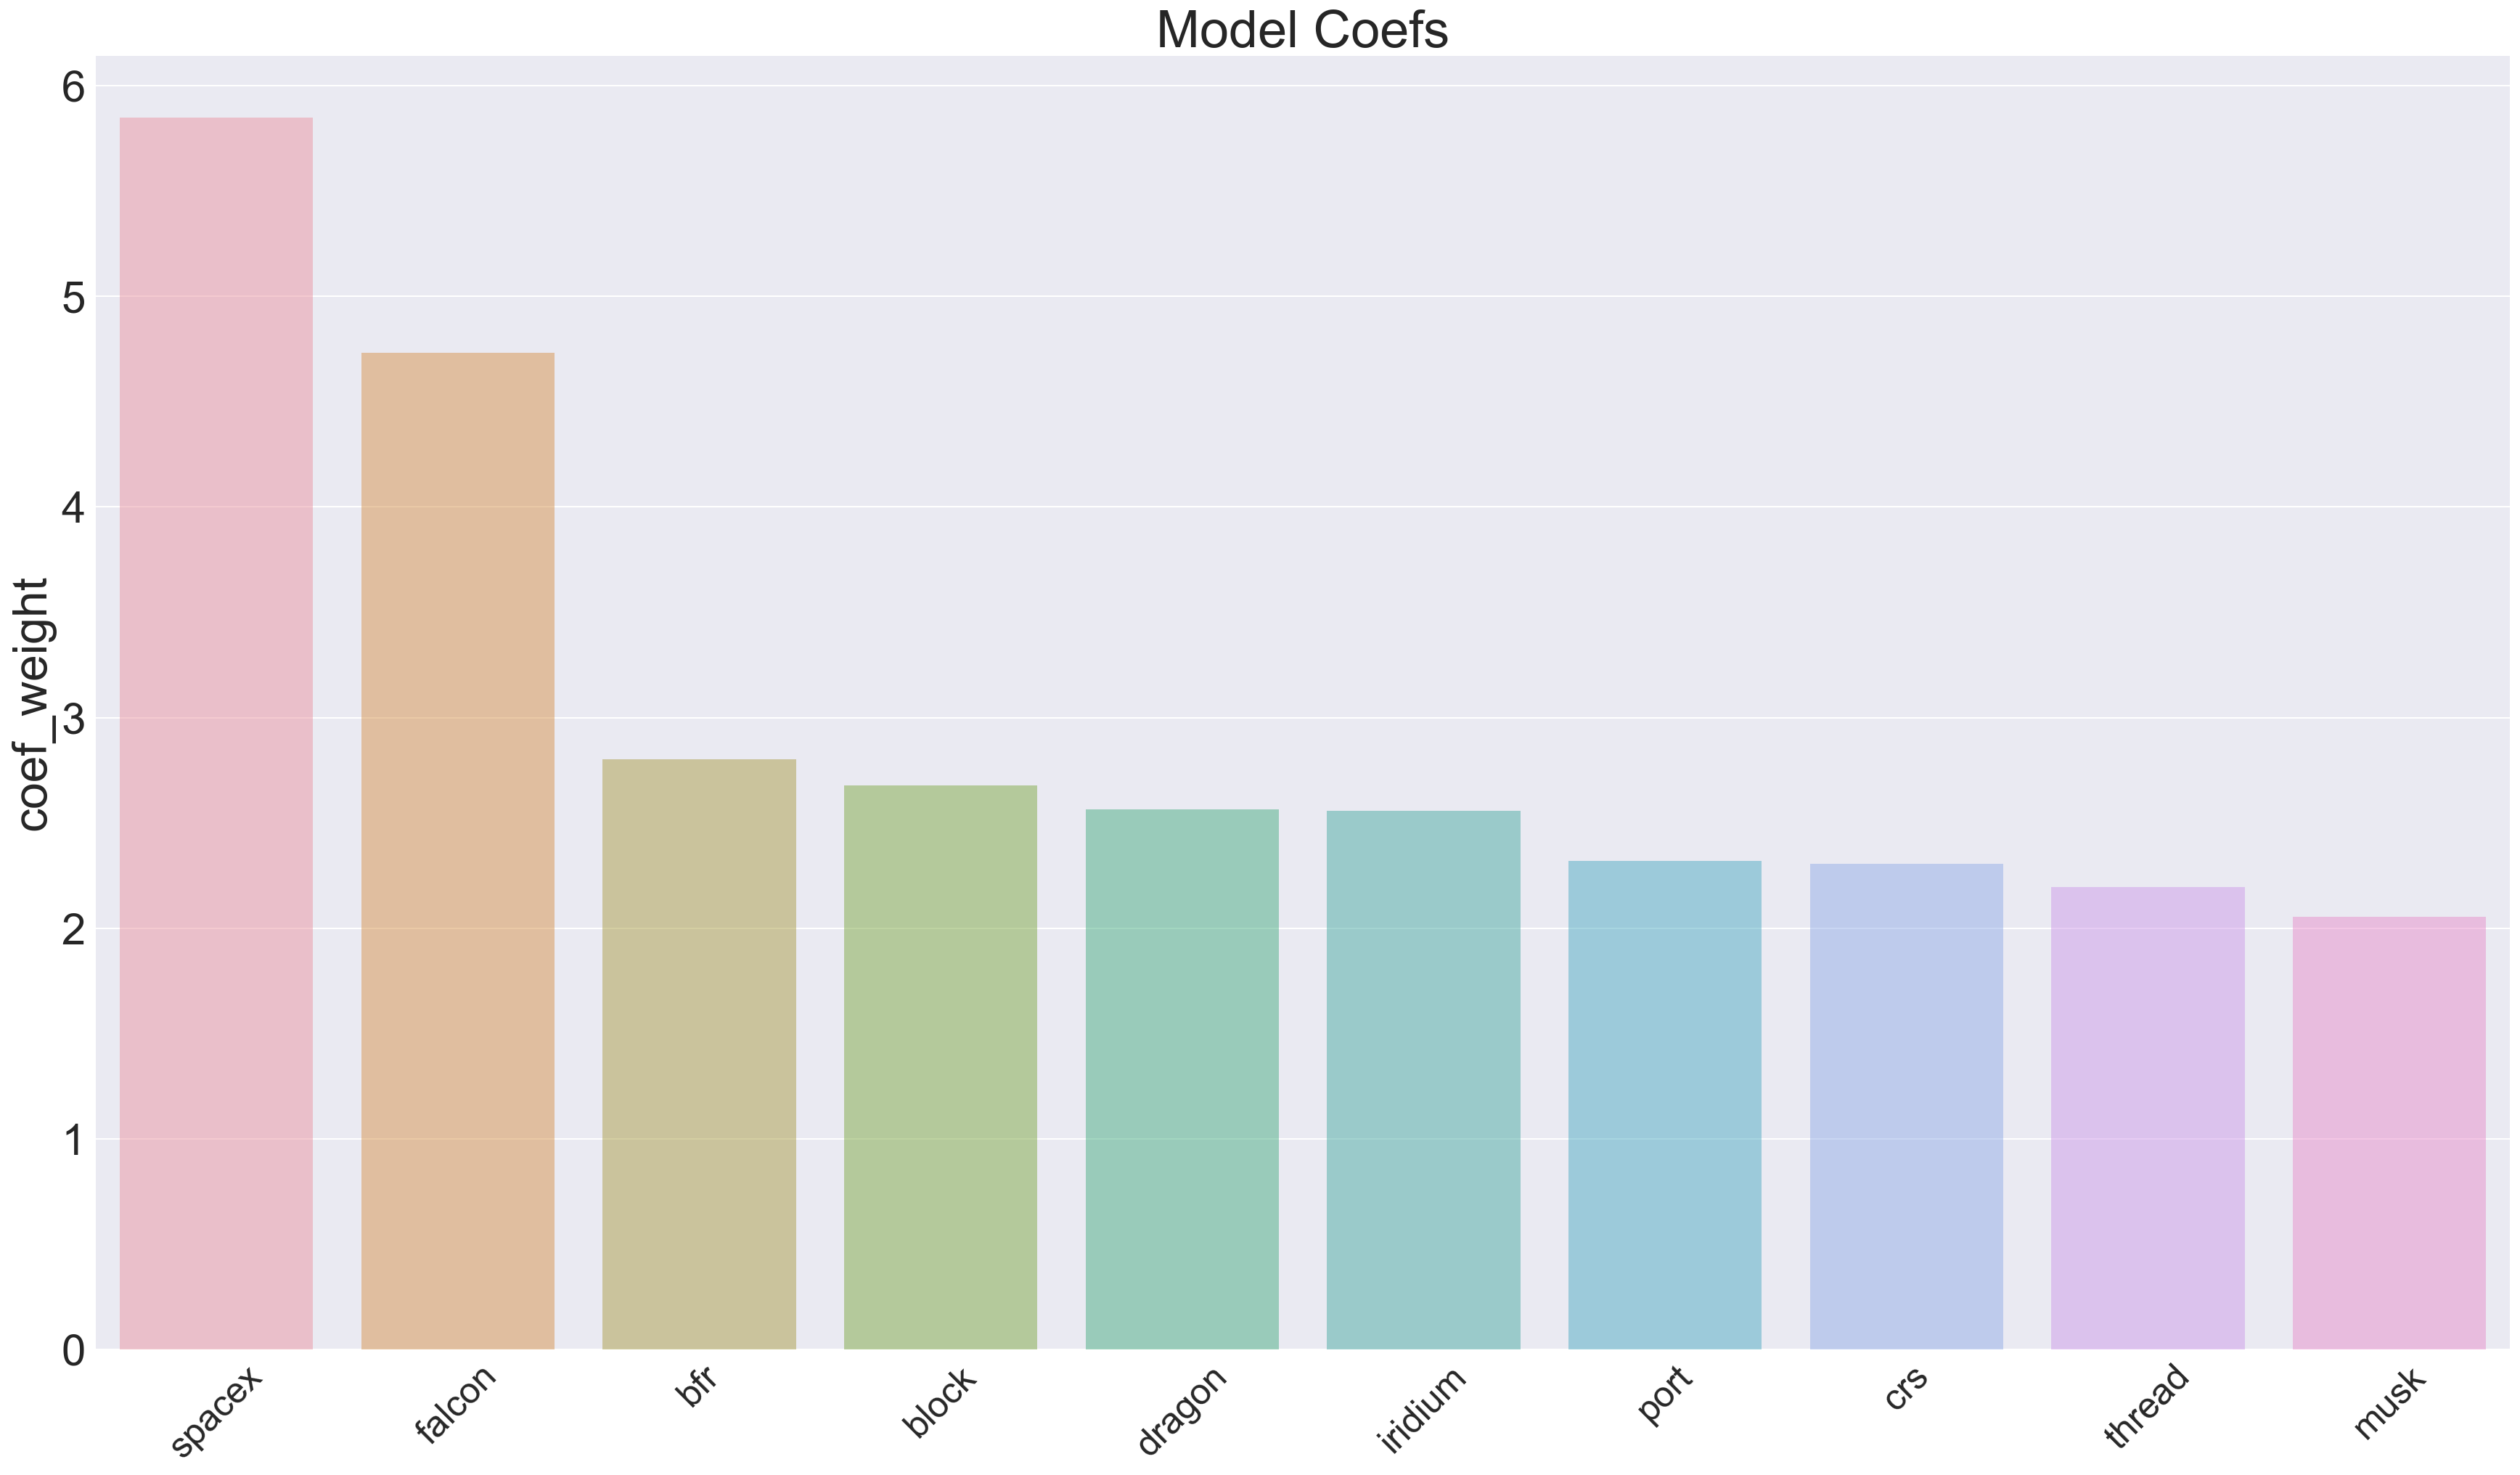

In [24]:
plt.figure(figsize=(25,15))
sns.set(font_scale=3)
plt.title('Model Coefs')
locs, labels = plt.xticks(fontsize=25)
plt.setp(labels, rotation=45)
sns.barplot(x=coef_df[['coef_weight']][:10].index, y='coef_weight', data=coef_df[['coef_weight']][:10], alpha=.5)
plt.tight_layout();
#plt.savefig('../plots/model_coefs_bar')

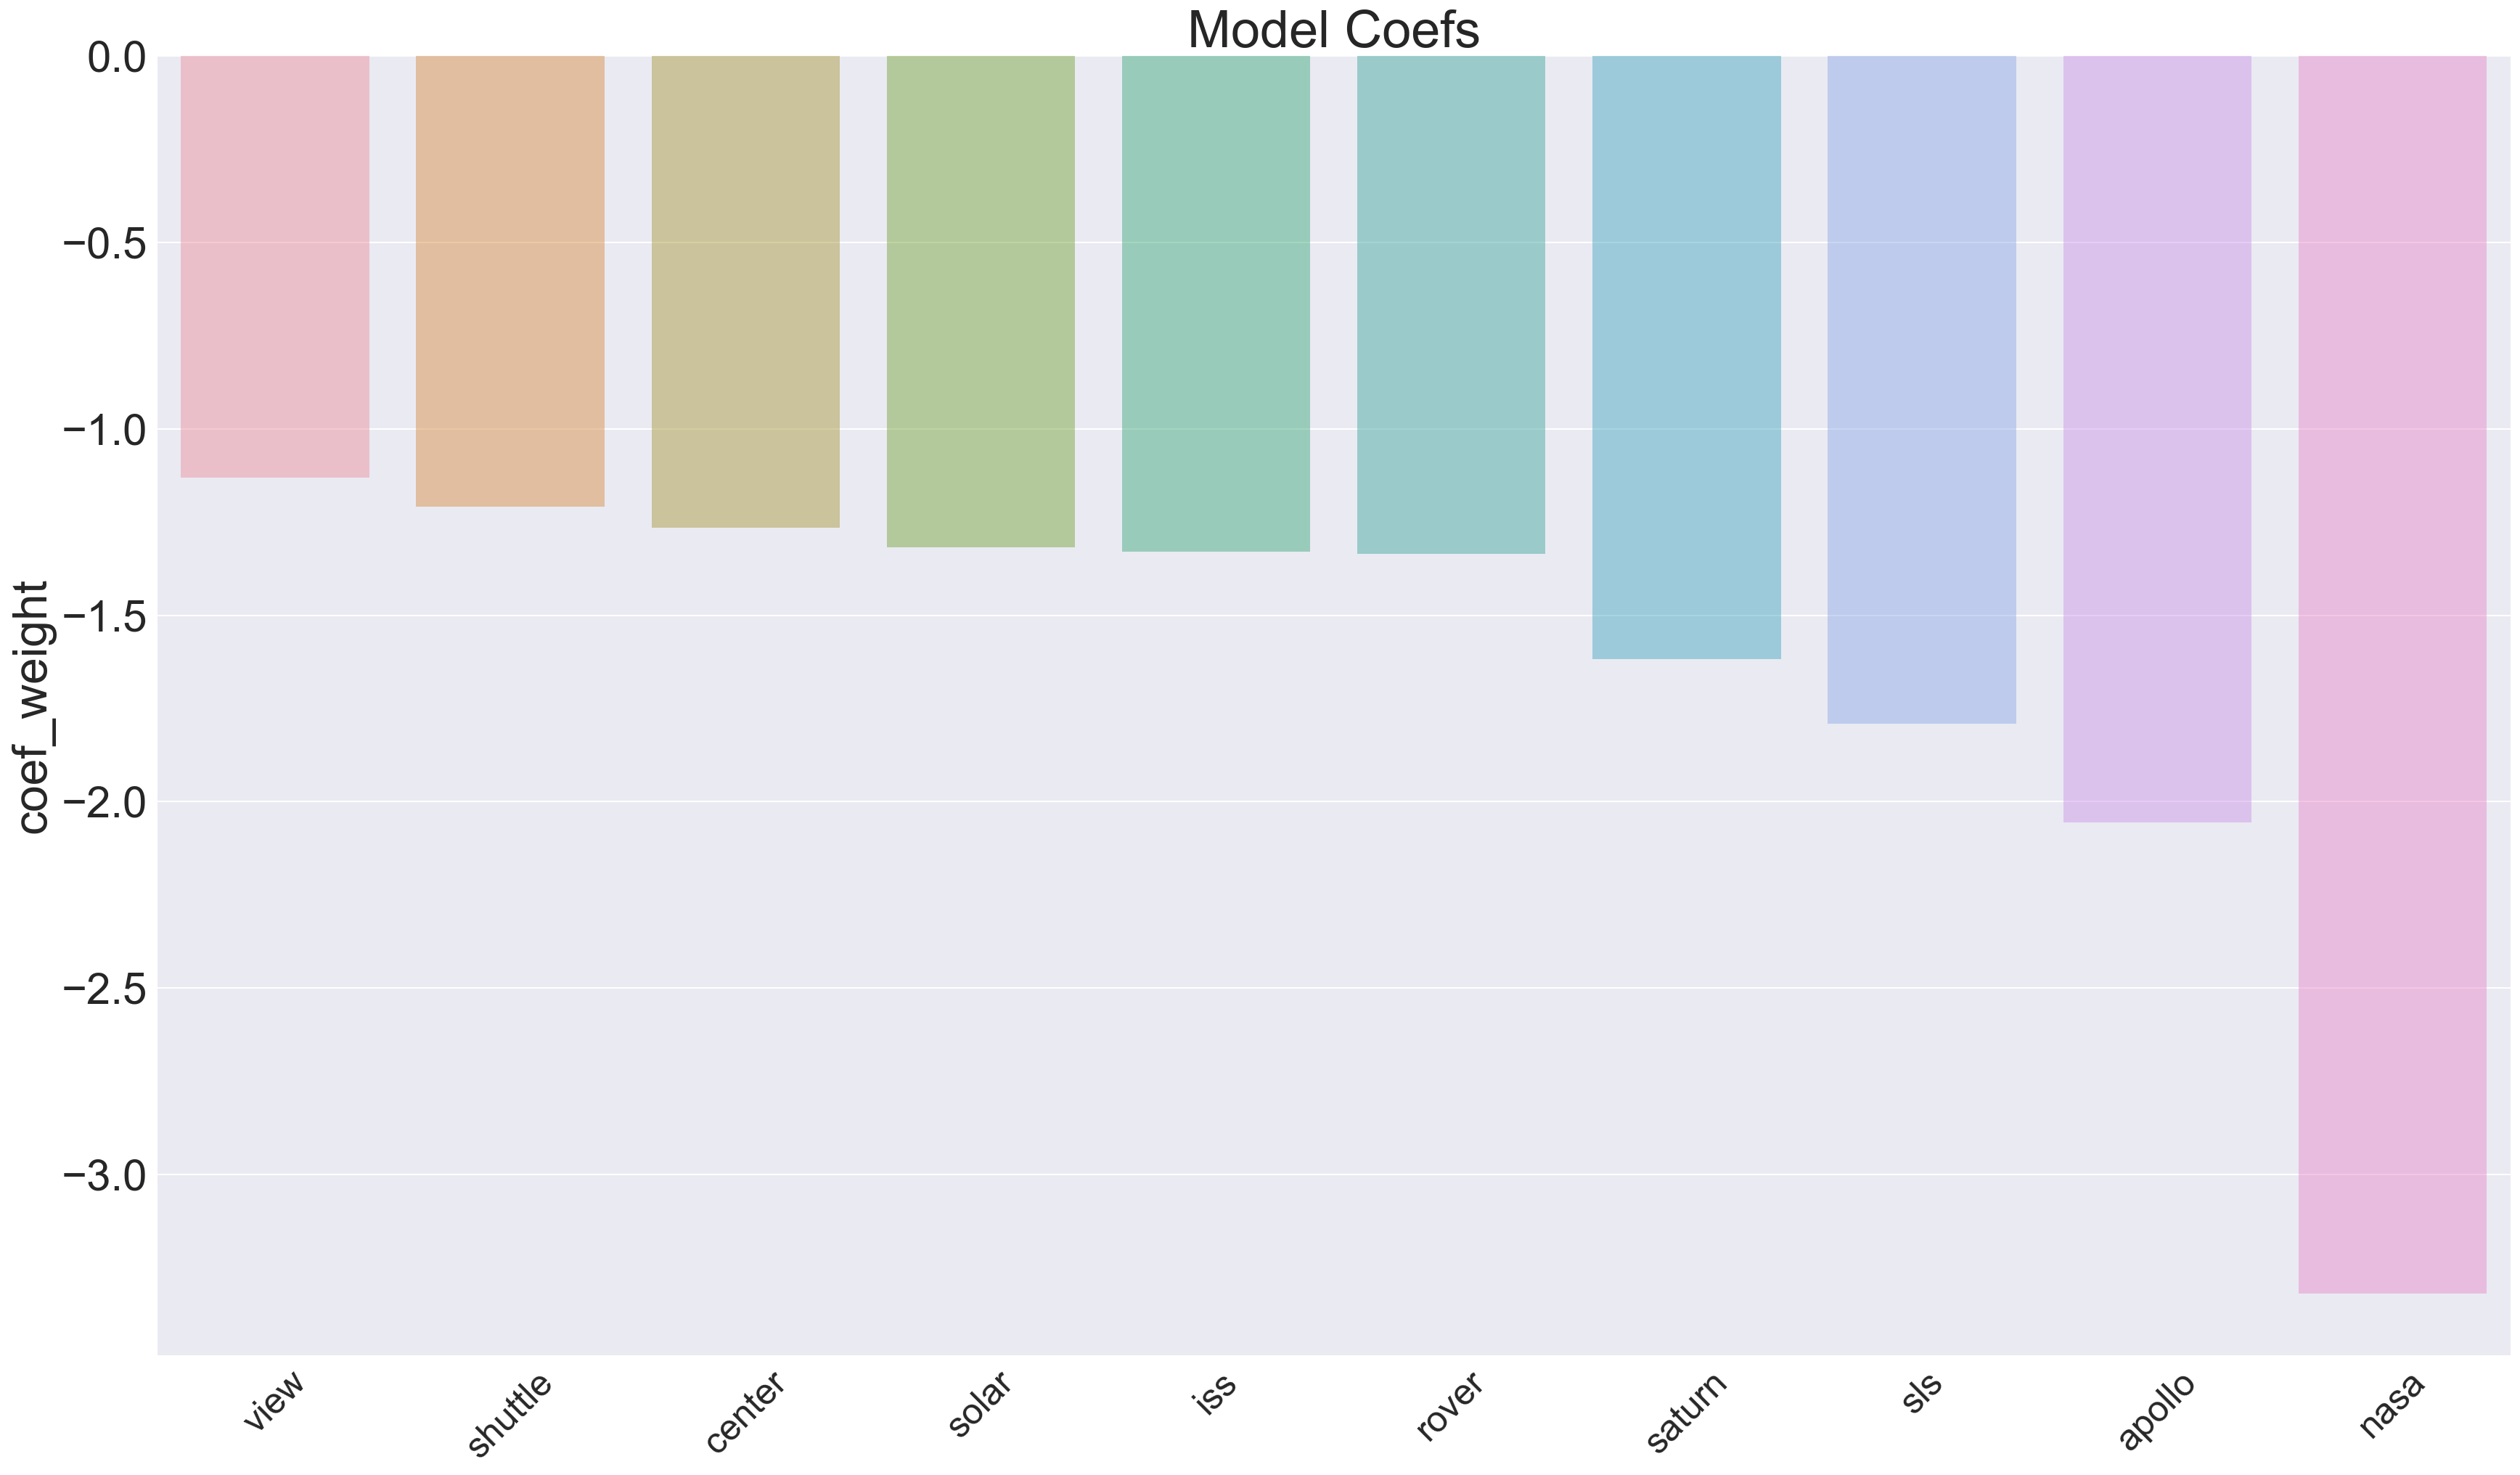

In [25]:
plt.figure(figsize=(25,15))
sns.set(font_scale=3)
plt.title('Model Coefs')
locs, labels = plt.xticks(fontsize=25)
plt.setp(labels, rotation=45)
sns.barplot(x=coef_df[['coef_weight']][-10:].index, y='coef_weight', data=coef_df[['coef_weight']][-10:], alpha=.5)
plt.tight_layout();
#plt.savefig('../plots/model_coefs_bar')

### Predictions 

Using a Confusion Matrix I can analze how the LogisticRegression model performed.

When predicting Space X and the subreddit actually being from Space X:
- 299 of my predictions were correct

When predicting Space X and the subreddit actually being from NASA:
- 44 of my predictions said Space X when it was actually form NASA

When predicting NASA and the subreddit actually being from NASA:
- 261 of my predictions were correct

When predicting NASA and the subreddit actually being from Space X:
- 8 of my predictions said Space X when it was actually form NASA

In [26]:
pred_gs = gs.predict(X_test)

In [27]:
con_mat = confusion_matrix(y_test, pred_gs)
con_mat

array([[299,   8],
       [ 44, 261]])

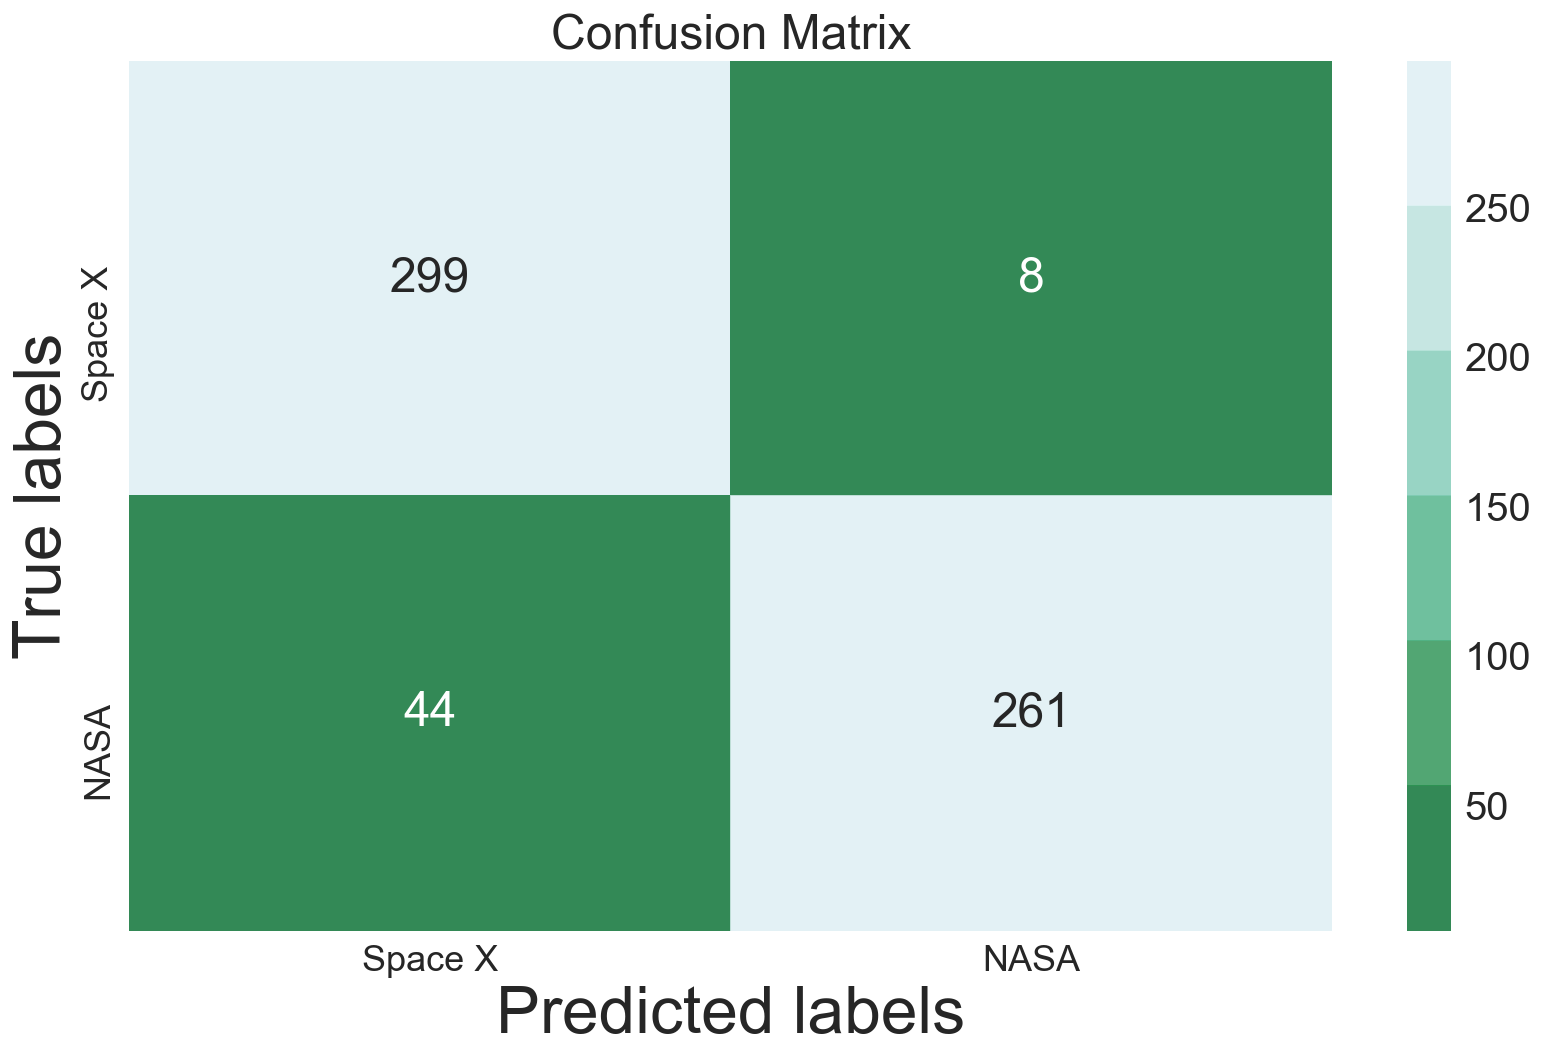

In [28]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.set(font_scale=2)
plt.xticks(fontsize=18); plt.yticks(fontsize=18)
cmap = sns.color_palette("BuGn_r")
sns.heatmap(con_mat, annot=True, cmap=cmap, fmt='g', alpha=.8);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Space X', 'NASA']); 
ax.yaxis.set_ticklabels(['Space X', 'NASA']);
plt.savefig('../plots/cm_logit')